In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os, sys

# Serial version

In [10]:
omp="2024-03-14_13-37-05"
serial="2024-03-14_13-39-02"
filename_omp=f"../benchmarks/benchmark_{omp}.csv"
filename_serial=f"../benchmarks/benchmark_{serial}.csv"

data_omp = {"gen_count": [], "n": [], "density": [], "seed": [], "time": []}
data_serial = {"gen_count": [], "n": [], "density": [], "seed": [], "time": []}

with open(filename_omp, "r") as fh:
    for line in fh:
        gen_count, n, density, seed, time = list(map(eval, line.split(",")))
        data_omp["gen_count"].append(gen_count)
        data_omp["n"].append(n)
        data_omp["density"].append(density)
        data_omp["seed"].append(seed)
        data_omp["time"].append(time)
        
df_omp = pd.DataFrame(data_omp)

with open(filename_serial, "r") as fh:
    for line in fh:
        gen_count, n, density, seed, time = list(map(eval, line.split(",")))
        data_serial["gen_count"].append(gen_count)
        data_serial["n"].append(n)
        data_serial["density"].append(density)
        data_serial["seed"].append(seed)
        data_serial["time"].append(time)

df_serial = pd.DataFrame(data_serial)

df_omp
#df_serial

,gen_count,n,density,seed,time
0,1000,2,0.4,1,0.0
1,1000,2,0.4,2,0.0
2,1000,2,0.4,3,0.0
3,1000,2,0.4,4,0.0
4,1000,2,0.4,5,0.0
5,1000,6,0.4,1,0.0
6,1000,6,0.4,2,0.0
7,1000,6,0.4,3,0.0
8,1000,6,0.4,4,0.0
9,1000,6,0.4,5,0.0


/tmp/ipykernel_57483/1095563024.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  speedup.append(time_serial / time_omp)
/tmp/ipykernel_57483/1095563024.py:7: RuntimeWarning: invalid value encountered in scalar divide
  speedup.append(time_serial / time_omp)


<Axes: xlabel='n', ylabel='speedup'>

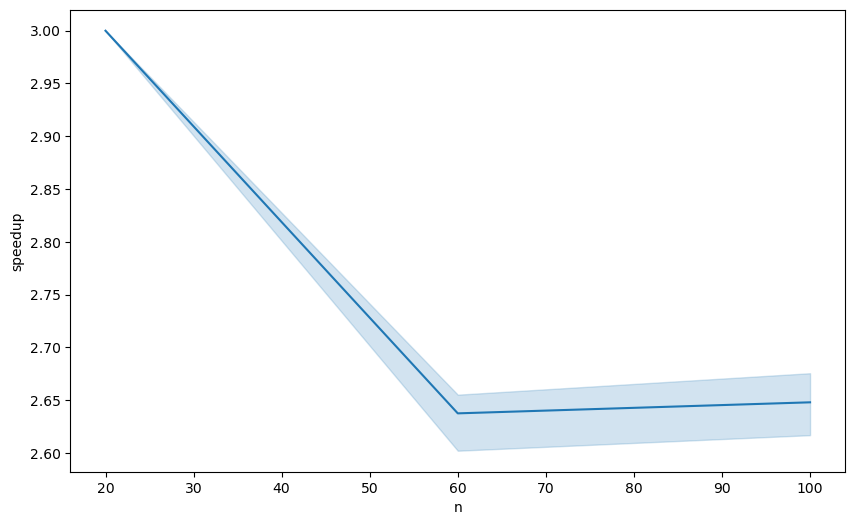

In [11]:
# for every N in df_omp calculate the speedup relative to df_serial
speedup = []
for i in range(len(df_omp)):
    n = df_omp["n"][i]
    time_omp = df_omp["time"][i]
    time_serial = df_serial[df_serial["n"] == n]["time"].values[0]
    if time_serial == 0 or time_omp == 0:
        speedup.append(0)
        continue
    speedup.append(time_serial / time_omp)

df_omp["speedup"] = speedup

# show the speedup for every N in a plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_omp, x="n", y="speedup")